In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

# Read in the Data

In [5]:
column_names = ['age' , 'workclass' , 'fnlwgt' , 'education' , 'education-num' , 'marital-status' , 'occupation' , 'relationship' , 'race' , 'sex' , 'capital-gain' , 'capital-loss' , 'hours-per-week' , 'native-country', "target"]

In [6]:
adultDF = pd.read_csv('./data/adult.data', index_col=False, names=column_names)

In [7]:
adultDF = strip_spaces(adultDF)

stripped leading/trailing spaces from all cells of string type


In [ ]:
columns_with_placeholders = ['workclass', 'occupation', 'native-country']
adultDF = replace_column_w_nan(adultDF, columns_with_placeholders, "?")

In [ ]:
msno.matrix(adultDF)

In [ ]:
for column in columns_with_placeholders:
    missing_values = adultDF[column].isna().sum()
    total_rows = adultDF.shape[0]
    percentage = missing_values / total_rows
    percentage = round(percentage * 100, 1)
    print("The {} column is missing {}% of rows".format(column, percentage))

#### 99999 clearly is a placeholder value given that the next closest capital-gain value is 41310. Therefore, we could consider 99999 an outlier

In [ ]:
adultDF[adultDF['capital-gain'] > 20000]['capital-gain'].value_counts().sort_index(ascending=False)

In [ ]:
adultDF[adultDF['capital-gain'] == 99999].shape[0]/adultDF.shape[0] * 100

#### Since .49% of the data is considered an outlier for capital-gain, we will drop those corresponding rows

In [ ]:
adultDF['hours-per-week'].value_counts().sort_index(ascending=False)

#### The number of hours per week could very well reach 99 hours and could realistically dip down to 1 hour given that our data includes a younger population. Therefore, 'hours-per-week' will not be treated as if it contains outliers.

In [ ]:
adultDF.describe()

In [ ]:
adultDF[adultDF['capital-gain'] > 0].shape[0]/adultDF.shape[0] * 100

In [ ]:
adultDF[adultDF['capital-gain'] > 0].shape[0] 

#### 2712 people have made some kind of capital gain out of 32561

# Check for Outliers

4356     3
3900     2
3770     2
3683     2
3004     2
2824    10
2754     2
2603     5
2559    12
2547     4
2489     1
2472     1
2467     1
2457     3
2444    12
2415    49
2392     9
2377    20
2352     2
2339    17
2282     1
2267     3
2258    25
2246     6
2238     2
2231     3
2206     6
2205     9
2201     1
2179    15
        ..
1668     4
1651     9
1648     2
1628    15
1617     9
1602    47
1594     8
1590    40
1579    20
1573     6
1564    25
1539     1
1504    18
1485    51
1411     1
1408    21
1380     7
1340     7
1258     4
1138     2
1092     7
974      2
880      6
810      2
653      3
625     12
419      3
323      3
213      4
155      1
Name: capital-loss, Length: 91, dtype: int64

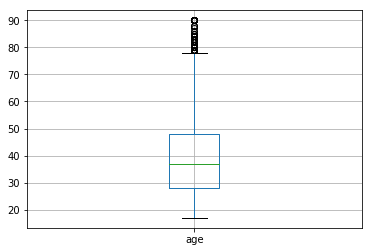

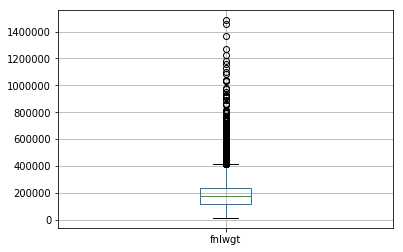

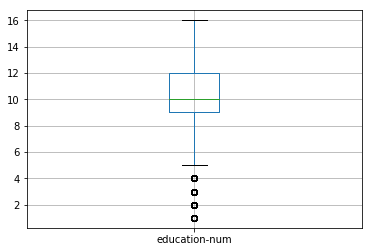

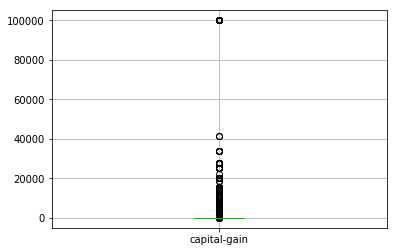

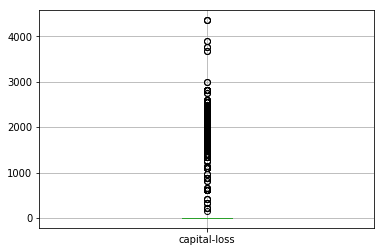

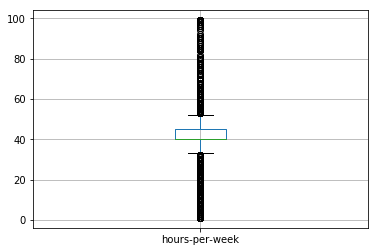

In [8]:
continuous_columns = list(adultDF.describe().columns)

for column in continuous_columns:
    plt.figure()
    adultDF.boxplot([column])

adultDF[adultDF['capital-gain'] > 20000]['capital-gain'].value_counts().sort_index(ascending=False)

adultDF[adultDF['capital-loss'] > 0]['capital-loss'].value_counts().sort_index(ascending=False)